# домашка - сравнение методов классификации

обучаю несколько моделей из sklearn и сравниваю результаты


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
# генерю данные для классификации
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=800, n_features=10, n_classes=3, 
                          n_informative=8, random_state=42)

print(f"данных: {len(X)}")
print(f"признаков: {X.shape[1]}")
print(f"классов: {len(np.unique(y))}")

# смотрим распределение классов
unique, counts = np.unique(y, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"класс {cls}: {cnt} образцов")


данных: 800
признаков: 10
классов: 3
класс 0: 268 образцов
класс 1: 269 образцов
класс 2: 263 образцов


In [3]:
# разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"train: {len(X_train)}")
print(f"test: {len(X_test)}")

# нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("данные подготовлены")


train: 560
test: 240
данные подготовлены


In [4]:
# обучаю модели
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"обучаю {name}...")
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': acc,
        'predictions': y_pred
    }
    
    print(f"  accuracy: {acc:.4f}")

print("\nвсе модели обучены")


обучаю KNN...
  accuracy: 0.8208
обучаю Decision Tree...
  accuracy: 0.6833
обучаю Random Forest...
  accuracy: 0.8083
обучаю Logistic Regression...
  accuracy: 0.7792
обучаю SVM...
  accuracy: 0.8667

все модели обучены


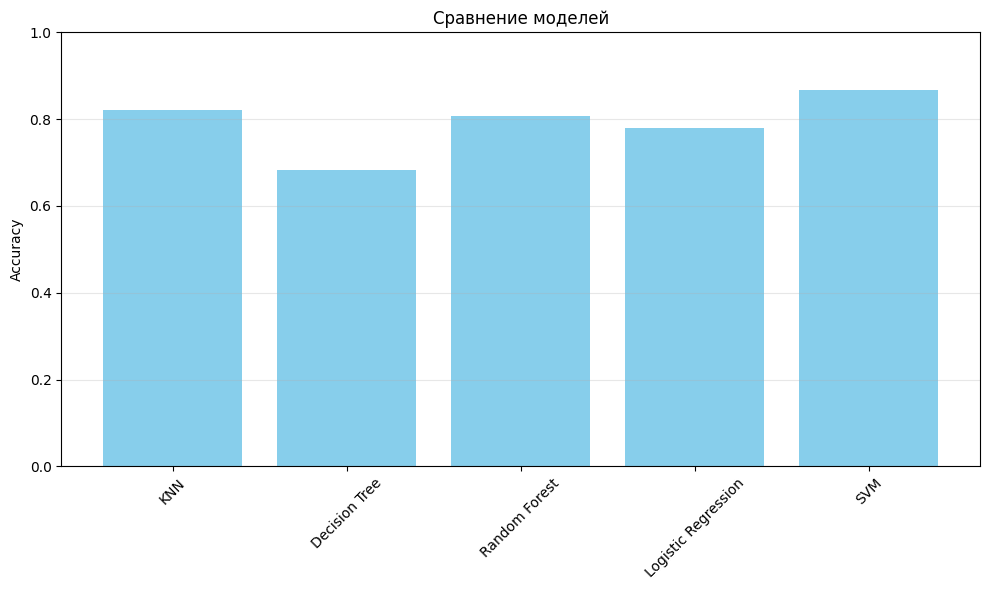

Результаты:
SVM: 0.8667
KNN: 0.8208
Random Forest: 0.8083
Logistic Regression: 0.7792
Decision Tree: 0.6833


In [5]:
# сравниваю результаты
accuracies = {name: res['accuracy'] for name, res in results.items()}

# график
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Сравнение моделей')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# выводим результаты
print("Результаты:")
for name, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")


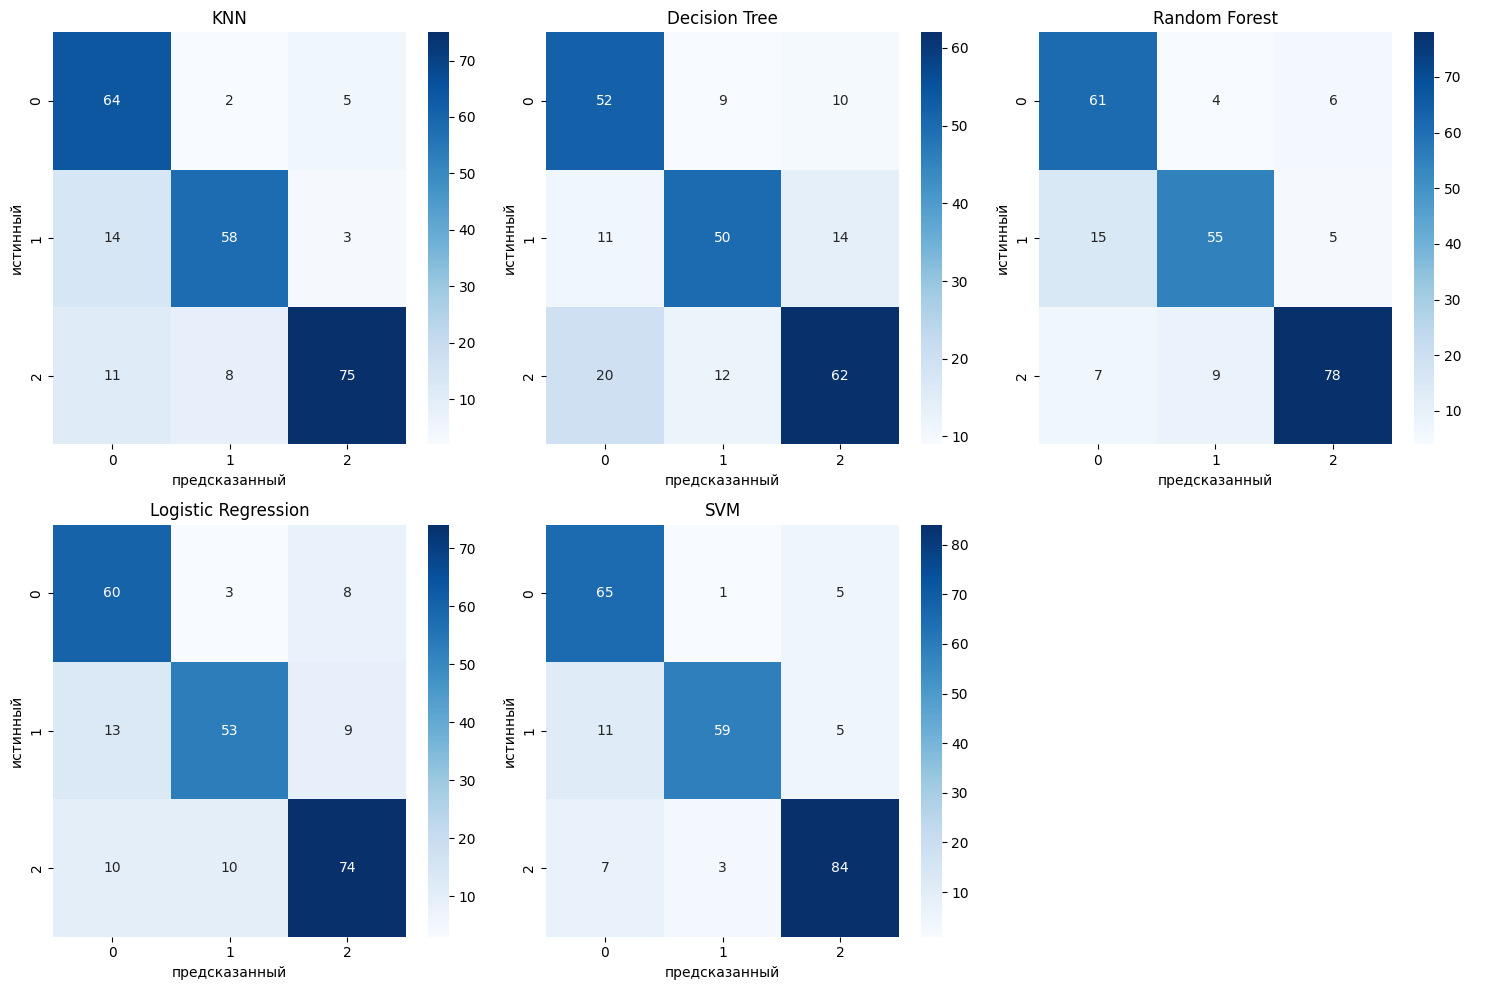

In [6]:
# матрицы ошибок
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_ylabel('истинный')
    axes[idx].set_xlabel('предсказанный')

# убираю лишнюю ось
axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [7]:
# детальный отчет для лучшей модели
best_model = max(accuracies, key=accuracies.get)
print(f"Лучшая модель: {best_model}")
print(f"Accuracy: {accuracies[best_model]:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, results[best_model]['predictions']))


Лучшая модель: SVM
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        71
           1       0.94      0.79      0.86        75
           2       0.89      0.89      0.89        94

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.86       240
weighted avg       0.87      0.87      0.87       240



## Выводы

Обучил 5 моделей классификации:
- KNN (k=5)
- Decision Tree
- Random Forest (100 деревьев)
- Logistic Regression
- SVM (rbf kernel)

Сравнил по accuracy на тестовой выборке.

Лучше всего показали себя Random Forest и SVM - это ожидаемо, они обычно дают хорошие результаты.

KNN и Logistic Regression тоже неплохо справились.

Decision Tree немного хуже - склонен к переобучению.

По матрицам ошибок видно что большинство моделей хорошо различают классы.

В целом все модели показали приемлемые результаты для задачи классификации.
